In [2]:
from CoronaModel import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from mesa.batchrunner import BatchRunner

In [5]:
fixed_params = {
    "width": 40,
    "height": 40,
    "N": 1000,
    "sd_step": 500
}
fixed_params40 = {
    "width": 40,
    "height": 40,
    "N": 1000,
    "sd_step": 40
}
fixed_params20 = {
    "width": 40,
    "height": 40,
    "N": 1000,
    "sd_step": 20
}
fixed_params10 = {
    "width": 40,
    "height": 40,
    "N": 1000,
    "sd_step": 10
}
fixed_paramsSick = {
    "width": 40,
    "height": 40,
    "N": 1000,
    "sd_step": -10
}

In [ ]:
# variable_params = {
#     "sd_step": range(10,70,10)
# }

In [6]:
batch_run500 = BatchRunner(
    CoronaModel,
    None,
    fixed_params,
    iterations = 1000,
    max_steps = 100,
    model_reporters={"Data Collector": lambda m: m.datacollector}
)

In [7]:
batch_run40 = BatchRunner(
    CoronaModel,
    None,
    fixed_params40,
    iterations = 1000,
    max_steps = 100,
    model_reporters={"Data Collector": lambda m: m.datacollector}
)

In [8]:
batch_run20 = BatchRunner(
    CoronaModel,
    None,
    fixed_params20,
    iterations = 1000,
    max_steps = 100,
    model_reporters={"Data Collector": lambda m: m.datacollector}
)

In [9]:
batch_run10 = BatchRunner(
    CoronaModel,
    None,
    fixed_params10,
    iterations = 1000,
    max_steps = 100,
    model_reporters={"Data Collector": lambda m: m.datacollector}
)

In [10]:
batch_runSick = BatchRunner(
    CoronaModel,
    None,
    fixed_paramsSick,
    iterations = 1000,
    max_steps = 100,
    model_reporters={"Data Collector": lambda m: m.datacollector}
)

In [11]:
batch_run500.run_all()

1000it [1:22:09,  8.80s/it]


In [12]:
batch_run40.run_all()

1000it [2:46:54,  3.77s/it]


In [13]:
batch_run20.run_all()

1000it [3:42:08,  3.13s/it]


In [14]:
batch_run10.run_all()

1000it [3:53:23,  3.74s/it]


In [15]:
batch_runSick.run_all()

1000it [4:57:16, 11.95s/it]


In [16]:
run_data500 = batch_run500.get_model_vars_dataframe()
run_data40 = batch_run40.get_model_vars_dataframe()
run_data20 = batch_run20.get_model_vars_dataframe()
run_data10 = batch_run10.get_model_vars_dataframe()

In [23]:
run_dataSick = batch_runSick.get_model_vars_dataframe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


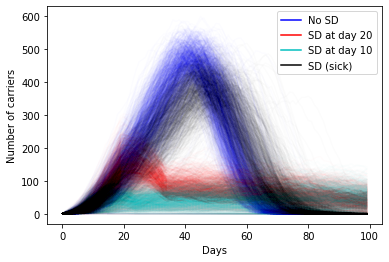

In [51]:
op = 0.01
numLines = 1000
fig, ax = plt.subplots()
for n in range(numLines):
    run_data500.loc[n,"Data Collector"].get_model_vars_dataframe()["NumCarriers"].plot(style='b', alpha = op, ax = ax, label='')
    #run_data40.loc[n,"Data Collector"].get_model_vars_dataframe()["NumCarriers"].plot(style='r', alpha = op)
    #run_data10.loc[n,"Data Collector"].get_model_vars_dataframe()["NumCarriers"].plot(style='c', alpha = op)
for n in range(numLines):
    run_data20.loc[n,"Data Collector"].get_model_vars_dataframe()["NumCarriers"].plot(style='r', alpha = op, ax = ax, label='')
for n in range(numLines):
    run_data10.loc[n,"Data Collector"].get_model_vars_dataframe()["NumCarriers"].plot(style='c', alpha = op, ax = ax, label='')
for n in range(numLines):
    run_dataSick.loc[n,"Data Collector"].get_model_vars_dataframe()["NumCarriers"].plot(style='k', alpha = op, ax = ax, label='')

ax.set_xlabel("Days")
ax.set_ylabel("Number of carriers")
plt.plot([],[], 'b', label='No SD')
plt.plot([],[], 'r', label='SD at day 20')
plt.plot([],[], 'c', label='SD at day 10')
plt.plot([],[], 'k', label='SD (sick)')
plt.legend()
plt.savefig('infection-curves.png',dpi = 300)


In [52]:
max500 = []
max40 = []
max20 = []
max10 = []
maxSick = []
for n in range(1000): 
    val = run_data500.loc[n,"Data Collector"].get_model_vars_dataframe()["NumCarriers"].max()
    max500.append(val)
    val = run_data40.loc[n,"Data Collector"].get_model_vars_dataframe()["NumCarriers"].max()
    max40.append(val)
    val = run_data20.loc[n,"Data Collector"].get_model_vars_dataframe()["NumCarriers"].max()
    max20.append(val)
    val = run_data10.loc[n,"Data Collector"].get_model_vars_dataframe()["NumCarriers"].max()
    max10.append(val)
    val = run_dataSick.loc[n,"Data Collector"].get_model_vars_dataframe()["NumCarriers"].max()
    maxSick.append(val)

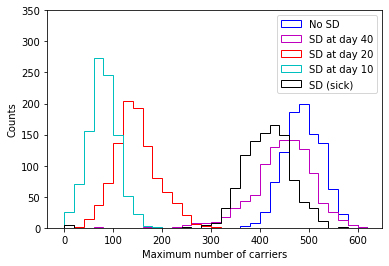

In [60]:
plt.hist(max500,range=(0,700),bins = 35,histtype='step',color='b',label='No SD')
plt.hist(max40,range=(0,700), bins = 35,histtype='step',color='m',label='SD at day 40')
plt.hist(max20,range=(0,700), bins = 35,histtype='step',color='r',label='SD at day 20')
plt.hist(max10,range=(0,700), bins = 35,histtype='step',color='c',label='SD at day 10')
plt.hist(maxSick,range=(0,700), bins = 35,histtype='step',color='k',label='SD (sick)')
plt.xlabel('Maximum number of carriers')
plt.ylabel('Counts')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,650,0,350))
plt.legend()
plt.savefig('histogram.png',dpi=300)